# Data wrangling WeRateDogs, 
#### part of Udacity Data Analyst formation, May 2020, v2

##### By Mauricio Cabreira

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gathering)
- [Assessing data](#assessing)
- [Cleaning data](#cleaning)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one](#one)
   - [Insight two](#two)
   - [Insight three](#three)
   - [Insight four](#four)

## Introduction

The project objective is to put in practice the learnings acquired during the Udacity Nano Degree Data Analist course. This exercise focus on Data Wrangling and a dataset to be wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. It includes also calls to Twitter API.

<a id='gathering'></a>
## Gathering data

#### The data come from 3 locations:

1. **Twitter archive file:** File with tweets downloaded manually from udacity site: twitter_archive_enhanced.csv

- **The tweet image predictions**, File with image predictions on the dog breed, downloaded programatically from udacity site: image_predictions.tsv: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Data gathered via Twitter API, with # of retweets, likes and more. Using the tweet IDs in the WeRateDogs Twitter archive (file 1 above), query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count and other data if applicable. 

In [2]:
#Import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import time
import json 
import seaborn as sns
from datetime import datetime
from functools import reduce



#### 1. Twitter archive file (twitter-archive-enhanced.csv)

In [237]:
df_1_tweets_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_1_tweets_enhanced.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [238]:
df_1_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2. The tweet image predictions (image-predictions.tsv)

In [239]:
#Download file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_2_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [240]:
df_2_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### 3. Twitter API & JSON (stored into tweet_json.txt)

In [7]:
#Set authentication API keys 

##### DELETE BEFORE SENDING FOR REVIEW ####

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)




In [8]:
#Get list of IDs from df_1, to add only those tweets to the file
tweet_ids = list(df_1_tweets_enhanced['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []

start = datetime.now().strftime("%H:%M:%S")


# Download tweets from Twitter via API and store into a dataset only if it matches an ID from the df_1_enhanced file (the master file).
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
        print("OK", str(tweet_id), datetime.now().strftime("%H:%M:%S"))

    except Exception as e:
        tweet_id_missing.append(tweet_id)
        print("NOT OK", str(tweet_id), str(e), datetime.now().strftime("%H:%M:%S"))

start, datetime.now().strftime("%H:%M:%S")

OK 892420643555336193 14:04:01
OK 892177421306343426 14:04:02
OK 891815181378084864 14:04:03
OK 891689557279858688 14:04:03
OK 891327558926688256 14:04:04
OK 891087950875897856 14:04:04
OK 890971913173991426 14:04:05
OK 890729181411237888 14:04:05
OK 890609185150312448 14:04:06
OK 890240255349198849 14:04:07
OK 890006608113172480 14:04:07
OK 889880896479866881 14:04:08
OK 889665388333682689 14:04:08
OK 889638837579907072 14:04:09
OK 889531135344209921 14:04:09
OK 889278841981685760 14:04:10
OK 888917238123831296 14:04:10
OK 888804989199671297 14:04:11
OK 888554962724278272 14:04:11
NOT OK 888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}] 14:04:12
OK 888078434458587136 14:04:12
OK 887705289381826560 14:04:13
OK 887517139158093824 14:04:14
OK 887473957103951883 14:04:14
OK 887343217045368832 14:04:15
OK 887101392804085760 14:04:15
OK 886983233522544640 14:04:16
OK 886736880519319552 14:04:16
OK 886680336477933568 14:04:17
OK 886366144734445568 14:04:18
OK 886

OK 845677943972139009 14:06:20
NOT OK 845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}] 14:06:21
OK 845397057150107648 14:06:21
OK 845306882940190720 14:06:22
OK 845098359547420673 14:06:22
OK 844979544864018432 14:06:23
OK 844973813909606400 14:06:23
NOT OK 844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}] 14:06:24
OK 844580511645339650 14:06:24
OK 844223788422217728 14:06:25
OK 843981021012017153 14:06:25
OK 843856843873095681 14:06:26
OK 843604394117681152 14:06:26
OK 843235543001513987 14:06:27
NOT OK 842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}] 14:06:28
OK 842846295480000512 14:06:28
OK 842765311967449089 14:06:29
OK 842535590457499648 14:06:29
OK 842163532590374912 14:06:30
OK 842115215311396866 14:06:30
OK 841833993020538882 14:06:31
OK 841680585030541313 14:06:31
OK 841439858740625411 14:06:32
OK 841320156043304961 14:06:32
OK 841314665196081154 14:06:33
OK 841077006473256960 14:06:34
OK

OK 813157409116065792 14:08:44
OK 813142292504645637 14:08:44
OK 813130366689148928 14:08:45
OK 813127251579564032 14:08:45
OK 813112105746448384 14:08:46
OK 813096984823349248 14:08:46
OK 813081950185472002 14:08:47
OK 813066809284972545 14:08:48
OK 813051746834595840 14:08:48
OK 812781120811126785 14:08:49
NOT OK 812747805718642688 [{'code': 144, 'message': 'No status found with that ID.'}] 14:08:49
OK 812709060537683968 14:08:50
OK 812503143955202048 14:08:51
OK 812466873996607488 14:08:51
OK 812372279581671427 14:08:52
OK 811985624773361665 14:08:52
OK 811744202451197953 14:08:53
OK 811647686436880384 14:08:53
OK 811627233043480576 14:08:54
OK 811386762094317568 14:08:55
OK 810984652412424192 14:08:55
OK 810896069567610880 14:08:56
OK 810657578271330305 14:08:56
OK 810284430598270976 14:08:57
OK 810254108431155201 14:08:57
OK 809920764300447744 14:08:58
OK 809808892968534016 14:08:58
OK 809448704142938112 14:08:59
OK 809220051211603969 14:09:00
OK 809084759137812480 14:09:00
OK 808

OK 778748913645780993 14:11:11
OK 778650543019483137 14:11:12
OK 778624900596654080 14:11:12
OK 778408200802557953 14:11:13
OK 778396591732486144 14:11:14
OK 778383385161035776 14:11:14
OK 778286810187399168 14:11:15
OK 778039087836069888 14:11:15
OK 778027034220126208 14:11:16
OK 777953400541634568 14:11:16
OK 777885040357281792 14:11:17
OK 777684233540206592 14:11:17
OK 777641927919427584 14:11:18
OK 777621514455814149 14:11:18
OK 777189768882946048 14:11:19
OK 776819012571455488 14:11:20
OK 776813020089548800 14:11:20
OK 776477788987613185 14:11:21
OK 776249906839351296 14:11:21
OK 776218204058357768 14:11:22
OK 776201521193218049 14:11:22
OK 776113305656188928 14:11:23
OK 776088319444877312 14:11:23
OK 775898661951791106 14:11:24
OK 775842724423557120 14:11:25
OK 775733305207554048 14:11:25
OK 775729183532220416 14:11:26
OK 775364825476165632 14:11:26
OK 775350846108426240 14:11:27
NOT OK 775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}] 14:11:28
OK 775

Rate limit reached. Sleeping for: 387


OK 758740312047005698 14:19:06
OK 758474966123810816 14:19:07
OK 758467244762497024 14:19:08
OK 758405701903519748 14:19:09
OK 758355060040593408 14:19:09
OK 758099635764359168 14:19:10
OK 758041019896193024 14:19:10
OK 757741869644341248 14:19:11
OK 757729163776290825 14:19:11
OK 757725642876129280 14:19:12
OK 757611664640446465 14:19:13
OK 757597904299253760 14:19:13
OK 757596066325864448 14:19:14
OK 757400162377592832 14:19:14
OK 757393109802180609 14:19:15
OK 757354760399941633 14:19:15
OK 756998049151549440 14:19:16
OK 756939218950160384 14:19:17
OK 756651752796094464 14:19:17
OK 756526248105566208 14:19:18
OK 756303284449767430 14:19:18
OK 756288534030475264 14:19:19
OK 756275833623502848 14:19:19
OK 755955933503782912 14:19:20
OK 755206590534418437 14:19:20
OK 755110668769038337 14:19:21
OK 754874841593970688 14:19:21
OK 754856583969079297 14:19:22
OK 754747087846248448 14:19:23
OK 754482103782404096 14:19:23
OK 754449512966619136 14:19:24
OK 754120377874386944 14:19:24
NOT OK 7

OK 723673163800948736 14:21:36
OK 723179728551723008 14:21:37
OK 722974582966214656 14:21:37
OK 722613351520608256 14:21:38
OK 721503162398597120 14:21:38
OK 721001180231503872 14:21:39
OK 720785406564900865 14:21:39
OK 720775346191278080 14:21:40
OK 720415127506415616 14:21:41
OK 720389942216527872 14:21:41
OK 720340705894408192 14:21:42
OK 720059472081784833 14:21:42
OK 720043174954147842 14:21:43
OK 719991154352222208 14:21:43
OK 719704490224398336 14:21:44
OK 719551379208073216 14:21:44
OK 719367763014393856 14:21:45
OK 719339463458033665 14:21:45
OK 719332531645071360 14:21:46
OK 718971898235854848 14:21:46
OK 718939241951195136 14:21:47
OK 718631497683582976 14:21:47
OK 718613305783398402 14:21:48
OK 718540630683709445 14:21:48
OK 718460005985447936 14:21:49
OK 718454725339934721 14:21:50
OK 718246886998687744 14:21:50
OK 718234618122661888 14:21:51
OK 717841801130979328 14:21:51
OK 717790033953034240 14:21:52
OK 717537687239008257 14:21:52
OK 717428917016076293 14:21:53
OK 71742

OK 697616773278015490 14:24:10
OK 697596423848730625 14:24:10
OK 697575480820686848 14:24:11
OK 697516214579523584 14:24:11
OK 697482927769255936 14:24:12
OK 697463031882764288 14:24:13
OK 697270446429966336 14:24:13
OK 697259378236399616 14:24:14
OK 697255105972801536 14:24:15
OK 697242256848379904 14:24:15
OK 696900204696625153 14:24:16
OK 696894894812565505 14:24:16
OK 696886256886657024 14:24:17
OK 696877980375769088 14:24:17
OK 696754882863349760 14:24:18
OK 696744641916489729 14:24:19
OK 696713835009417216 14:24:19
OK 696518437233913856 14:24:20
OK 696490539101908992 14:24:20
OK 696488710901260288 14:24:21
OK 696405997980676096 14:24:21
OK 696100768806522880 14:24:22
OK 695816827381944320 14:24:23
OK 695794761660297217 14:24:23
OK 695767669421768709 14:24:24
OK 695629776980148225 14:24:24
OK 695446424020918272 14:24:25
OK 695409464418041856 14:24:25
OK 695314793360662529 14:24:26
OK 695095422348574720 14:24:27
OK 695074328191332352 14:24:27
OK 695064344191721472 14:24:28
OK 69505

OK 681297372102656000 14:26:42
OK 681281657291280384 14:26:43
OK 681261549936340994 14:26:44
OK 681242418453299201 14:26:44
OK 681231109724700672 14:26:45
OK 681193455364796417 14:26:45
OK 680970795137544192 14:26:46
OK 680959110691590145 14:26:46
OK 680940246314430465 14:26:47
OK 680934982542561280 14:26:47
OK 680913438424612864 14:26:48
OK 680889648562991104 14:26:49
OK 680836378243002368 14:26:49
OK 680805554198020098 14:26:50
OK 680801747103793152 14:26:50
OK 680798457301471234 14:26:51
OK 680609293079592961 14:26:51
OK 680583894916304897 14:26:52
OK 680497766108381184 14:26:52
OK 680494726643068929 14:26:53
OK 680473011644985345 14:26:53
OK 680440374763077632 14:26:54
OK 680221482581123072 14:26:54
OK 680206703334408192 14:26:55
OK 680191257256136705 14:26:56
OK 680176173301628928 14:26:56
OK 680161097740095489 14:26:57
OK 680145970311643136 14:26:57
OK 680130881361686529 14:26:58
OK 680115823365742593 14:26:58
OK 680100725817409536 14:26:59
OK 680085611152338944 14:26:59
OK 68007

Rate limit reached. Sleeping for: 382


OK 676975532580409345 14:34:11
OK 676957860086095872 14:34:12
OK 676949632774234114 14:34:13
OK 676948236477857792 14:34:13
OK 676946864479084545 14:34:14
OK 676942428000112642 14:34:14
OK 676936541936185344 14:34:15
OK 676916996760600576 14:34:15
OK 676897532954456065 14:34:16
OK 676864501615042560 14:34:16
OK 676821958043033607 14:34:17
OK 676819651066732545 14:34:18
OK 676811746707918848 14:34:18
OK 676776431406465024 14:34:19
OK 676617503762681856 14:34:19
OK 676613908052996102 14:34:20
OK 676606785097199616 14:34:20
OK 676603393314578432 14:34:21
OK 676593408224403456 14:34:22
OK 676590572941893632 14:34:22
OK 676588346097852417 14:34:23
OK 676582956622721024 14:34:23
OK 676575501977128964 14:34:24
OK 676533798876651520 14:34:24
OK 676496375194980353 14:34:25
OK 676470639084101634 14:34:25
OK 676440007570247681 14:34:26
OK 676430933382295552 14:34:27
OK 676263575653122048 14:34:27
OK 676237365392908289 14:34:28
OK 676219687039057920 14:34:28
OK 676215927814406144 14:34:29
OK 67619

OK 671151324042559489 14:36:43
OK 671147085991960577 14:36:44
OK 671141549288370177 14:36:44
OK 671138694582165504 14:36:45
OK 671134062904504320 14:36:45
OK 671122204919246848 14:36:46
OK 671115716440031232 14:36:46
OK 671109016219725825 14:36:47
OK 670995969505435648 14:36:48
OK 670842764863651840 14:36:48
OK 670840546554966016 14:36:49
OK 670838202509447168 14:36:49
OK 670833812859932673 14:36:50
OK 670832455012716544 14:36:50
OK 670826280409919488 14:36:51
OK 670823764196741120 14:36:51
OK 670822709593571328 14:36:52
OK 670815497391357952 14:36:52
OK 670811965569282048 14:36:53
OK 670807719151067136 14:36:53
OK 670804601705242624 14:36:54
OK 670803562457407488 14:36:55
OK 670797304698376195 14:36:55
OK 670792680469889025 14:36:56
OK 670789397210615808 14:36:56
OK 670786190031921152 14:36:57
OK 670783437142401025 14:36:57
OK 670782429121134593 14:36:58
OK 670780561024270336 14:36:58
OK 670778058496974848 14:36:59
OK 670764103623966721 14:36:59
OK 670755717859713024 14:37:00
OK 67073

OK 666362758909284353 14:39:13
OK 666353288456101888 14:39:14
OK 666345417576210432 14:39:15
OK 666337882303524864 14:39:15
OK 666293911632134144 14:39:16
OK 666287406224695296 14:39:16
OK 666273097616637952 14:39:17
OK 666268910803644416 14:39:17
OK 666104133288665088 14:39:18
OK 666102155909144576 14:39:18
OK 666099513787052032 14:39:19
OK 666094000022159362 14:39:20
OK 666082916733198337 14:39:20
OK 666073100786774016 14:39:21
OK 666071193221509120 14:39:21
OK 666063827256086533 14:39:22
OK 666058600524156928 14:39:22
OK 666057090499244032 14:39:23
OK 666055525042405380 14:39:23
OK 666051853826850816 14:39:24
OK 666050758794694657 14:39:24
OK 666049248165822465 14:39:25
OK 666044226329800704 14:39:25
OK 666033412701032449 14:39:26
OK 666029285002620928 14:39:26
OK 666020888022790149 14:39:27


('14:04:00', '14:39:27')

In [9]:
len(tweet_id_success), len(tweet_id_missing)

(2331, 25)

In [10]:
#Write data downloaded from Twitter via API to tweet_json.txt 
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [11]:
tweet_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [12]:
# Load API downloaded data into df_3 and store only relevant information.
df_3_tweets_from_API = pd.read_json('tweet_json.txt')

#Store relevant info
df_3_tweets_from_API['tweet_id'] = tweet_id_success
df_3_tweets_from_API = df_3_tweets_from_API[['tweet_id', 'favorite_count', 'retweet_count', 'retweeted']]
df_3_tweets_from_API.head()

tweet_id  favorite_count  retweet_count  retweeted
0  892420643555336193           36253           7722      False
1  892177421306343426           31266           5706      False
2  891815181378084864           23541           3782      False
3  891689557279858688           39551           7877      False
4  891327558926688256           37772           8494      False

<a id='assessing'></a>
## Assessing data

### 1. twitter-archive-enhanced.csv


#### Visual assess

In [241]:
df_1_tweets_enhanced.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Programmatic  assess

In [242]:
df_1_tweets_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [243]:
df_1_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [244]:
df_1_tweets_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [245]:
df_1_tweets_enhanced.duplicated().sum()

0

In [246]:
df_1_tweets_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [247]:
df_1_tweets_enhanced['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                   2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1    2
https://twitter.com/dog_rates/status/819227688460238848/photo/1                                                                                                                                                                                 2
https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1                                                                                                                 2
https://twitter.com/dog_rates/st

In [248]:
df_1_tweets_enhanced['expanded_urls'].duplicated().sum()

137

In [249]:
df_1_tweets_enhanced['expanded_urls'].isnull().sum()

59

In [276]:
df_1_tweets_enhanced.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [277]:

for i, line in df_master.iterrows():
    if ',' in line.expanded_urls:
        print(line.expanded_urls)

       
       

In [278]:
#check numerators, since there are some quite big, and some 0..
df_1_tweets_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [279]:
df_1_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [280]:
df_1_tweets_enhanced[df_1_tweets_enhanced['rating_numerator'] > 15]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
55    881633300179243008           8.816070e+17         4.738443e+07   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1712  680494726643068929                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
55    2017-07-02 21:58:53 +0000   
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
290   2017-03-04 22:12:52 +0000   
313   2017-02-24 21:54:03 +0000   
340   2017-02-16 13:11:49 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1663  2016-01-01 06:22:03 +0000   
1712  2015-12-25 21:06:00 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
55    <a href="http://twitter.com/download/iphone" r...   
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433

In [281]:
#check numerators, since there are some quite big, and some 0..
df_1_tweets_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [282]:
df_1_tweets_enhanced[df_1_tweets_enhanced['rating_denominator'] != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

### 2. The tweet image predictions.tsv





#### Visual assess

In [283]:
df_2_image_prediction.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

#Some rows have all false predictions (p1, p2, and p3)

#### Programatic assess

In [286]:
df_2_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [287]:
df_2_image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [288]:
df_2_image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [289]:
df_2_image_prediction.duplicated().sum()

0

In [290]:
df_2_image_prediction.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

### 3. Twitter API & JSON (stored into tweet_json.txt)

 



#### Visual assess

In [291]:
df_3_tweets_from_API

tweet_id  favorite_count  retweet_count  retweeted
0     892420643555336193           36253           7722      False
1     892177421306343426           31266           5706      False
2     891815181378084864           23541           3782      False
3     891689557279858688           39551           7877      False
4     891327558926688256           37772           8494      False
...                  ...             ...            ...        ...
2326  666049248165822465              96             39      False
2327  666044226329800704             272            132      False
2328  666033412701032449             112             41      False
2329  666029285002620928             121             42      False
2330  666020888022790149            2415            462      False

[2331 rows x 4 columns]

#### Programatic assess

In [292]:
df_3_tweets_from_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
 3   retweeted       2331 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [293]:
df_3_tweets_from_API.nunique()

tweet_id          2331
favorite_count    1979
retweet_count     1690
retweeted            1
dtype: int64

In [294]:
df_3_tweets_from_API.describe()

tweet_id  favorite_count  retweet_count
count  2.331000e+03     2331.000000    2331.000000
mean   7.419079e+17     7572.942943    2708.632347
std    6.823170e+16    11753.635781    4580.638653
min    6.660209e+17        0.000000       1.000000
25%    6.782670e+17     1320.000000     548.000000
50%    7.182469e+17     3294.000000    1270.000000
75%    7.986692e+17     9270.000000    3148.000000
max    8.924206e+17   156437.000000   77957.000000

In [295]:
#check if retweet
df_3_tweets_from_API.query('retweeted == True')


Empty DataFrame
Columns: [tweet_id, favorite_count, retweet_count, retweeted]
Index: []

## Findings
#### Quality or 'q' : completeness, validity, accuracy, consistency issues
#### Tidiness or 't': structural issues. strucuture datasets to facilitate analysis



**Generic**

0.1-(t) combine the 3 datasets into "df_master", that later will be saved to twitter-archive-master.csv file

0.2-(q) remove unnecessary columns identified as not relevant for the analysis


**1. twitter-archive-enhanced.csv** 

1.1-(t) create a stage column and add dog stages (doggo, puppo, pupper, floofer), and delete the 4 do type columns

1.2-(q) some "expanded" URL fields have duplicated info. remove the duplicated data.

1.3-(q) some rows do not have a tweet ID, and can't be used/matched with data sets 2 and 3

1.4-(q) some denominators are different than 10 (smaller or bigger). This could be set to 10, but actually this column could even be deleted since it has no use. Delete it.


**2. The tweet image predictions.tsv** 

2.1-(q) If all predictions are FALSE, drop the row, as it seems to be something else than a dog.

2.2-(q) p1 shall be used if true, if not use p2 or p3, in this order. create a new

2.3-(t) create a new row to store the preferred prediction ('predicted_dog') + score ('predicted_dog_score')

2.3.1-(q) drop p1,p2,p3 rows and its scores.

2.4-(q) Some dog predicted types  have the "_" character. Remove it and add a space instead.

2.5-(q) on dog predicted types , put first letter in upper-case.


**3. Twitter API & JSON (stored into tweet_json.txt)**

3.1-(q) Remove columns not relevant when creating the df_3_tweets_from_API dataset (kept id, favorite count and retweet, retweeded_status count only) - done in Gathering data step

3.2-(q) Remote 'retweet' column, as none was retweeded 




## Items fixed after Udacity's reviewer notes


1.5-(q) - Remove tweets that are retweets (rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).

1.6-(q) - Remove replies as they are not original tweets (field in_reply_to_status_id), similar as item 1.5 above. 

<a id='cleaning'></a>
## Cleaning data

**0.1-(t) combine the 3 datasets into "df_master", that later will be saved to twitter-archive-master.csv file**

In [296]:

#Combine all 3 sources into a df_master
dfs = [df_1_tweets_enhanced, df_2_image_prediction, df_3_tweets_from_API]
df_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
df_master.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...  p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...  ...   False   
1  https://twitter.com/dog_rates/status/892177421...  ...    True   
2  https://twitter.com/dog_rates/status/891815181...  ...    True   
3  https://twitter.com/dog_rates/status/891689557...  ...   False   
4  https://twitter.com/dog_rates/status/891327558...  ...    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog favorite_count  retweet_count retweeted  
0  False          36253           7722     False  
1   True          31266           5706     False  
2   True          23541           3782     False  
3  False          39551           7877     False  
4   True          37772           8494     False  

[5 rows x 31 columns]

In [297]:
for i, v in enumerate(df_master.columns):
    print(i, v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo
17 jpg_url
18 img_num
19 p1
20 p1_conf
21 p1_dog
22 p2
23 p2_conf
24 p2_dog
25 p3
26 p3_conf
27 p3_dog
28 favorite_count
29 retweet_count
30 retweeted


In [298]:
df_master[df_master['tweet_id'] == 78670908284982886]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count, retweeted]
Index: []

[0 rows x 31 columns]

**1.5-(q) - Remove tweets that are retweets (rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).**

In [299]:
#check how many rows are retweets
df_master.retweeted_status_user_id.isnull().sum(), df_master.retweeted_status_id.notnull().sum()

(1987, 72)

In [300]:
#show some of these rows
df_master[df_master.retweeted_status_id.notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
32    885311592912609280                    NaN                  NaN   
67    877611172832227328                    NaN                  NaN   
107   867072653475098625                    NaN                  NaN   
130   860924035999428608                    NaN                  NaN   
167   851861385021730816                    NaN                  NaN   
...                  ...                    ...                  ...   
745   754874841593970688                    NaN                  NaN   
762   752309394570878976                    NaN                  NaN   
1022  711998809858043904                    NaN                  NaN   
1963  667550904950915073                    NaN                  NaN   
1964  667550882905632768                    NaN                  NaN   

                      timestamp  \
32    2017-07-13 01:35:06 +0000   
67    2017-06-21 19:36:23 +0000   
107   2017-05-23 17:40:04 +0000   
130   2017-05-06 18:27:40 +0000   
167   2017-04-11 18:15:55 +0000   
...                         ...   
745   2016-07-18 03:06:01 +0000   
762   2016-07-11 01:11:51 +0000   
1022  2016-03-21 19:31:59 +0000   
1963  2015-11-20 03:51:52 +0000   
1964  2015-11-20 03:51:47 +0000   

                                                 source  \
32    <a href="http://twitter.com/download/iphone" r...   
67    <a href="http://twitter.com/download/iphone" r...   
107   <a href="http://twitter.com/download/iphone" r...   
130   <a href="http://twitter.com/download/iphone" r...   
167   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
745   <a href="http://twitter.com/download/iphone" r...   
762   <a href="http://twitter.com/download/iphone" r...   
1022  <a href="http://twitter.com/download/iphone" r...   
1963  <a href="http://twitter.com" rel="nofollow">Tw...   
1964  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
32    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
67    RT @rachel2195: @dog_rates the boyfriend and h...         8.768508e+17   
107   RT @rachaeleasler: these @dog_rates hats are 1...         8.650134e+17   
130   RT @tallylott: h*ckin adorable promposal. 13/1...         8.609145e+17   
167   RT @eddie_coe98: Thanks @dog_rates completed m...         8.482894e+17   
...                                                 ...                  ...   
745   RT @dog_rates: This is Rubio. He has too much ...         6.791584e+17   
762   RT @dog_rates: Everyone needs to watch this. 1...         6.753544e+17   
1022  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
1963  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
1964  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
32                4.196984e+09  2017-02-12 01:04:29 +0000   
67                5.128045e+08  2017-06-19 17:14:49 +0000   
107               7.874618e+17  2017-05-18 01:17:25 +0000   
130               3.638908e+08  2017-05-06 17:49:42 +0000   
167               3.410211e+08  2017-04-01 21:42:03 +0000   
...                        ...                        ...   
745               4.196984e+09  2015-12-22 04:35:49 +0000   
762               4.196984e+09  2015-12-11 16:40:19 +0000   
1022              7.832140e+05  2016-03-21 19:29:52 +0000   
1963              4.296832e+09  2015-11-20 03:43:06 +0000   
1964              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  ...  p1_dog  \
32    https://twitter.com/dog_rates/status/830583320...  ...    True   
67    https://twitter.com/rachel2195/status/87685077...  ...    True   
107   https://twitter.com/rachaeleasler/status/86501...  ...    True   
130   https://twitter.com/tallylott/sta

In [301]:
#delete the rows
df_master.drop(df_master[df_master.retweeted_status_id.notnull()].index, inplace = True) 
  
  

In [302]:
#confirm if rows where dropped. Sucess.
df_master[df_master.retweeted_status_id.notnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count, retweeted]
Index: []

[0 rows x 31 columns]

**1.6-(q) - Remove replies as they are not original tweets, similar as item 1.5 above. Field in_reply_to_status_id**

In [303]:
#check how many rows are retweets
df_master.in_reply_to_status_id.isnull().sum(), df_master.in_reply_to_status_id.notnull().sum()

(1964, 23)

In [304]:
#delete the rows
df_master.drop(df_master[df_master.in_reply_to_status_id.notnull()].index, inplace = True) 
  
  

In [305]:
#confirm if rows where dropped. Sucess.
df_master[df_master.in_reply_to_status_id.notnull()]


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count, retweeted]
Index: []

[0 rows x 31 columns]

**0.2-(q) remove unnecessary columns identified as not relevant for the analysis (iterative process)**

In [306]:
#drop unused columns for the exercise
df_master.drop(['in_reply_to_status_id', 
               'in_reply_to_user_id', 
               'source', 
               'retweeted_status_id', 
               'retweeted_status_user_id', 
               'retweeted_status_timestamp', 
               'rating_denominator', 
               'retweeted'],
                axis = 1, inplace=True)

df_master.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

       name doggo floofer pupper puppo  ...   p1_conf  p1_dog  \
0   Phineas  None    None   None  None  ...  0.097049   False   
1     Tilly  None    None   None  None  ...  0.323581    True   
2    Archie  None    None   None  None  ...  0.716012    True   
3     Darla  None    None   None  None  ...  0.170278   False   
4  Franklin  None    None   None  None  ...  0.555712    True   

                   p2   p2_conf  p2_dog                           p3  \
0               bagel  0.085851   False                       banana   
1            Pekinese  0.090647    True                     papillon   
2            malamute  0.078253    True                       kelpie   
3  Labrador_retriever  0.168086    True                      spatula   
4    English_springer  0.225770    True  German_short-haired_pointer   

    p3_conf  p3_dog favorite_count  retweet_count  
0  0.076110   False          36253           7722  
1  0.068957    True          31266           5706  
2  0.031379    True          23541           3782  
3  0.040836   False          39551           7877  
4  0.175219    True          37772           8494  

[5 rows x 23 columns]

In [307]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1964 non-null   int64  
 1   timestamp         1964 non-null   object 
 2   text              1964 non-null   object 
 3   expanded_urls     1964 non-null   object 
 4   rating_numerator  1964 non-null   int64  
 5   name              1964 non-null   object 
 6   doggo             1964 non-null   object 
 7   floofer           1964 non-null   object 
 8   pupper            1964 non-null   object 
 9   puppo             1964 non-null   object 
 10  jpg_url           1964 non-null   object 
 11  img_num           1964 non-null   int64  
 12  p1                1964 non-null   object 
 13  p1_conf           1964 non-null   float64
 14  p1_dog            1964 non-null   bool   
 15  p2                1964 non-null   object 
 16  p2_conf           1964 non-null   float64


**1.1-(t) create a stage column and add dog stages (doggo, puppo, pupper, floofer), and delete the 4 do type columns**

In [308]:
df_master['dog_stage']='None'

In [309]:
df_master.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

       name doggo floofer pupper puppo  ... p1_dog                  p2  \
0   Phineas  None    None   None  None  ...  False               bagel   
1     Tilly  None    None   None  None  ...   True            Pekinese   
2    Archie  None    None   None  None  ...   True            malamute   
3     Darla  None    None   None  None  ...  False  Labrador_retriever   
4  Franklin  None    None   None  None  ...   True    English_springer   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  \
0  0.085851   False                       banana  0.076110   False   
1  0.090647    True                     papillon  0.068957    True   
2  0.078253    True                       kelpie  0.031379    True   
3  0.168086    True                      spatula  0.040836   False   
4  0.225770    True  German_short-haired_pointer  0.175219    True   

   favorite_count retweet_count  dog_stage  
0           36253          7722       None  
1           31266          5706       None  
2           23541          3782       None  
3           39551          7877       None  
4           37772          8494       None  

[5 rows x 24 columns]

In [310]:
df_master.groupby('dog_stage').dog_stage.count()

dog_stage
None    1964
Name: dog_stage, dtype: int64

In [311]:
df_master.groupby('doggo').doggo.count()

doggo
None     1892
doggo      72
Name: doggo, dtype: int64

In [312]:
df_master.groupby('puppo').puppo.count()

puppo
None     1941
puppo      23
Name: puppo, dtype: int64

In [313]:
df_master.groupby('pupper').pupper.count()

pupper
None      1755
pupper     209
Name: pupper, dtype: int64

In [314]:
df_master.groupby('floofer').floofer.count()

floofer
None       1956
floofer       8
Name: floofer, dtype: int64

In [315]:
doggo_counter = 0
puppo_counter = 0
pupper_counter = 0
floofer_counter = 0
doggo_puppo_counter = 0
doggo_pupper_counter = 0
doggo_floofer_counter = 0




repeated = 0

for i, line in df_master.iterrows():
    repeated = 0
    if line['doggo'] == 'doggo':
 
        if line['puppo'] == 'puppo':
            #dog is also puppo
            doggo_puppo_counter += 1
            df_master.loc[i, 'dog_stage'] = "doggo & puppo"
            continue
        else:
            if line['pupper'] == 'pupper':
                #dog is also pupper
                doggo_pupper_counter += 1
                df_master.loc[i, 'dog_stage'] = "doggo & pupper"
                continue
            else:
                if line['floofer'] == 'floofer':
                    #dog is also pupper
                    doggo_floofer_counter += 1
                    df_master.loc[i, 'dog_stage'] = "doggo & floofer"
                    continue
                else:
                    #dog is just a doggo
                    doggo_counter += 1
                    df_master.loc[i, 'dog_stage'] = "doggo"
                    continue
        
    if line['puppo'] == 'puppo':
        puppo_counter += 1
        repeated += 1
        #print(i, line['puppo'])
        df_master.loc[i, 'dog_stage'] = "puppo"
        
    if line['pupper'] == 'pupper':
        pupper_counter += 1
        repeated += 1
        #print(i, line['pupper'])
        df_master.loc[i, 'dog_stage'] = "pupper"
        
    if line['floofer'] == 'floofer':
        floofer_counter += 1
        repeated += 1
        #print(i, line['floofer'])
        df_master.loc[i, 'dog_stage'] = "floofer"
        
    if repeated > 1:
        print(i, repeated)
    
doggo_counter, puppo_counter, pupper_counter, floofer_counter, doggo_puppo_counter, doggo_pupper_counter, doggo_floofer_counter

(62, 22, 201, 7, 1, 8, 1)

In [316]:
df_master.groupby('dog_stage').dog_stage.count()

dog_stage
None               1662
doggo                62
doggo & floofer       1
doggo & pupper        8
doggo & puppo         1
floofer               7
pupper              201
puppo                22
Name: dog_stage, dtype: int64

In [317]:
#drop the doggo, puppo, pupper and floofer rows as they value have beenn added to dog_stage row.
df_master.drop(['doggo', 
               'puppo', 
               'pupper', 
               'floofer'],
                axis = 1, inplace=True)

df_master.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

       name                                          jpg_url  img_num  \
0   Phineas  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1     Tilly  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2    Archie  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3     Darla  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
4  Franklin  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

            p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0       orange  0.097049   False               bagel  0.085851   False   
1    Chihuahua  0.323581    True            Pekinese  0.090647    True   
2    Chihuahua  0.716012    True            malamute  0.078253    True   
3  paper_towel  0.170278   False  Labrador_retriever  0.168086    True   
4       basset  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  favorite_count  \
0                       banana  0.076110   False           36253   
1                     papillon  0.068957    True           31266   
2                       kelpie  0.031379    True           23541   
3                      spatula  0.040836   False           39551   
4  German_short-haired_pointer  0.175219    True           37772   

   retweet_count dog_stage  
0           7722      None  
1           5706      None  
2           3782      None  
3           7877      None  
4           8494      None

**1.2-(q) some "expanded" URL fields have duplicated info. remove the duplicated data.**

In [318]:
#list rows that have repeated URLs

for i, row in df_master.iterrows():   
    
    if ',' in row['expanded_urls']:
        #print("Found dup: ", i,  row['expanded_urls'])
        comma_location = row['expanded_urls'].find(",")
        cleaned_url = row['expanded_urls'][0:comma_location]
        df_master.at[i, 'expanded_urls'] = cleaned_url
        #print (i, df_master.loc[df_master.index == i, 'expanded_urls'].values[0])


In [319]:
#check if rows with extra url were gone:

for i, row in df_master.iterrows():   
    
    if ',' in row['expanded_urls']:
        print("found wrong row: ", i,  row['expanded_urls'])

**1.4-(q) some denominators are different than 10 (smaller or bigger). This could be set to 10, but actually this column could even be deleted since it has no use. Delete it.**

Done in step 0.2

**2.3-(t) create a new row to store the preferred prediction ('predicted_dog')**

In [320]:
#doing item 2.3 before item 2.1 since we can optimize the algo in 2.1 to include the right dog prediction at the new location
df_master['dog_predicted_type']='None'
df_master['dog_prediction_score']=0.0



In [321]:
df_master.head(3)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

      name                                          jpg_url  img_num  \
0  Phineas  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1    Tilly  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2   Archie  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   

          p1   p1_conf  ...   p2_conf p2_dog        p3   p3_conf p3_dog  \
0     orange  0.097049  ...  0.085851  False    banana  0.076110  False   
1  Chihuahua  0.323581  ...  0.090647   True  papillon  0.068957   True   
2  Chihuahua  0.716012  ...  0.078253   True    kelpie  0.031379   True   

   favorite_count  retweet_count  dog_stage  dog_predicted_type  \
0           36253           7722       None                None   
1           31266           5706       None                None   
2           23541           3782       None                None   

  dog_prediction_score  
0                  0.0  
1                  0.0  
2                  0.0  

[3 rows x 22 columns]

**2.1-(q) If all predictions are FALSE, drop the row, as it seems to be something else than a dog.**

Done in step 2.2

**2.2-(q) p1 shall be used if true, if not use p2 or p3, in this order. create a new**

In [322]:
#2.1 and 2.2 combined here

for i, row in df_master.iterrows():   
    
    if row['p1_dog']:
        #print(i, ", P1 found a dog: ", row['p1'])
        #dog found, populate the dog_predicted_type & dog_prediction_score columns for this row
        df_master.at[i, 'dog_predicted_type'] = row['p1']
        df_master.at[i, 'dog_prediction_score'] = row['p1_conf']
        continue 
        
    #else:
        #print(i, ", P1 does not seem to be a dog: ", row['p1'])
        
    if row['p2_dog']:
        #print(i, ", P2 found a dog: ", row['p2'])
        #dog found, populate the dog_predicted_type & dog_prediction_score columns for this row
        df_master.at[i, 'dog_predicted_type'] = row['p2']
        df_master.at[i, 'dog_prediction_score'] = row['p2_conf']
        continue
    #else:
        #print(i, ", P2 does not seem to be a dog: ", row['p2'])

              
    if row['p3_dog']:
        #print(i, ", P3 found a dog: ", row['p3'])
        #dog found, populate the dog_predicted_type & dog_prediction_score columns for this row
        df_master.at[i, 'dog_predicted_type'] = row['p3']
        df_master.at[i, 'dog_prediction_score'] = row['p3_conf']
   
    else:
        #print(i, "Definitely not a dog: ", row['p3'])
        #it is not a dog. drop the row
        #item 2.1
        df_master.drop(i, inplace=True)


**2.3.1-(q) drop p1,p2,p3 rows and its scores.**

In [323]:
#drop unused columns for the exercise
df_master.drop(['p1', 
               'p2', 
               'p3', 
               'p1_conf', 
               'p2_conf', 
               'p3_conf', 
               'p1_dog', 
               'p2_dog',
               'p3_dog'],
                axis = 1, inplace=True)



In [324]:
df_master.head(3)

tweet_id                  timestamp  \
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   

                                                text  \
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   

                                       expanded_urls  rating_numerator  \
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   

     name                                          jpg_url  img_num  \
1   Tilly  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2  Archie  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3   Darla  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   

   favorite_count  retweet_count dog_stage  dog_predicted_type  \
1           31266           5706      None           Chihuahua   
2           23541           3782      None           Chihuahua   
3           39551           7877      None  Labrador_retriever   

   dog_prediction_score  
1              0.323581  
2              0.716012  
3              0.168086

**2.4-(q) Some dog predicted types have the "_" character. Remove it and add a space instead.**

In [325]:
for i, row in df_master.iterrows():  
    
    if '_' in row['dog_predicted_type']:
        dog = row['dog_predicted_type'].replace('_', ' ') 
        #print("OLD: ", row['dog_predicted_type'], "NEW: ", dog)
        df_master.at[i, 'dog_predicted_type'] = dog

**2.5-(q) on dog predicted type, put first letter in upper-case.**

In [326]:
for i, row in df_master.iterrows():   
    dog = row['dog_predicted_type'].capitalize() 
    df_master.at[i, 'dog_predicted_type'] = dog
    #print("New: ", row['dog_predicted_type'], "NEW: ", dog)
    print(dog)

Chihuahua
Chihuahua
Labrador retriever
Basset
Chesapeake bay retriever
Appenzeller
Pomeranian
Irish terrier
Pembroke
Samoyed
French bulldog
Pembroke
French bulldog
Golden retriever
Whippet
Golden retriever
Golden retriever
Siberian husky
French bulldog
Basset
Pembroke
Mexican hairless
Samoyed
Chihuahua
Kuvasz
French bulldog
Pug
Blenheim spaniel
Pug
Malamute
Italian greyhound
Chow
Pug
Pembroke
German shepherd
Doberman
Golden retriever
Chow
Golden retriever
Eskimo dog
Labrador retriever
Pembroke
Golden retriever
Golden retriever
Weimaraner
Saluki
Samoyed
Pembroke
Golden retriever
Chihuahua
Miniature pinscher
Basset
German short-haired pointer
English springer
Labrador retriever
Vizsla
Italian greyhound
Basset
French bulldog
Chesapeake bay retriever
Basset
Saluki
Pembroke
Bloodhound
Golden retriever
Bernese mountain dog
Labrador retriever
Siberian husky
West highland white terrier
Labrador retriever
Cocker spaniel
Flat-coated retriever
Cardigan
Newfoundland
Vizsla
Labrador retriever
Pug
C

Staffordshire bullterrier
Miniature pinscher
Pug
Rottweiler
English springer
Boston bull
Shih-tzu
Great dane
Pug
Beagle
Borzoi
Labrador retriever
Tibetan mastiff
Norwich terrier
Rottweiler
Labrador retriever
Yorkshire terrier
German shepherd
Pug
Pomeranian
Great dane
Rhodesian ridgeback
Siberian husky
Papillon
Yorkshire terrier
Chesapeake bay retriever
Lakeland terrier
Collie
Golden retriever
Boston bull
Chow
Pomeranian
Pug
Old english sheepdog
Bernese mountain dog
Border collie
Labrador retriever
Chow
Pembroke
Miniature schnauzer
Weimaraner
Chihuahua
Labrador retriever
Pembroke
Soft-coated wheaten terrier
Chihuahua
Kelpie
Chow
Labrador retriever
Bluetick
Toy poodle
Mexican hairless
Maltese dog
Malamute
Miniature pinscher
Pembroke
Airedale
Keeshond
Italian greyhound
Lakeland terrier
French bulldog
Pembroke
Leonberg
Cocker spaniel
Golden retriever
Eskimo dog
Boxer
Chihuahua
English setter
Beagle
English springer
Whippet
Vizsla
Curly-coated retriever
Lakeland terrier
Siberian husky
Schip

#### **3.1-(q) Remove columns not relevant when creating the df_3_tweets_from_API dataset (kept id, favorite count and retweet, retweeded_status count only) - done in Gathering data step**

Done in step 0.2

**3.2-(q) Remote 'retweet' column, as none was retweeded**

Done in step 0.2

<a id='store'></a>
## Storing, Analyzing, and Visualizing

### Storing

**Store master file to "twitter_archive_master.csv"**

In [327]:
df_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Analyzing & Visualizing

In [328]:
#reading the file, so Analyst does not have to run all the processes above to query.
df = pd.read_csv('twitter_archive_master.csv')
df.head()

tweet_id                  timestamp  \
0  892177421306343426  2017-08-01 00:17:27 +0000   
1  891815181378084864  2017-07-31 00:18:03 +0000   
2  891689557279858688  2017-07-30 15:58:51 +0000   
3  891327558926688256  2017-07-29 16:00:24 +0000   
4  891087950875897856  2017-07-29 00:08:17 +0000   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Darla. She commenced a snooze mid meal...   
3  This is Franklin. He would like you to stop ca...   
4  Here we have a majestic great white breaching ...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891689557...                13   
3  https://twitter.com/dog_rates/status/891327558...                12   
4  https://twitter.com/dog_rates/status/891087950...                13   

       name                                          jpg_url  img_num  \
0     Tilly  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
1    Archie  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
2     Darla  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
3  Franklin  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   
4      None  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg        1   

   favorite_count  retweet_count dog_stage        dog_predicted_type  \
0           31266           5706      None                 Chihuahua   
1           23541           3782      None                 Chihuahua   
2           39551           7877      None        Labrador retriever   
3           37772           8494      None                    Basset   
4           19023           2845      None  Chesapeake bay retriever   

   dog_prediction_score  
0              0.323581  
1              0.716012  
2              0.168086  
3              0.555712  
4              0.425595

In [329]:
df.dog_predicted_type.nunique()

113

There are 113 different breeds rated

In [330]:
df.dog_predicted_type.value_counts()

Golden retriever        156
Labrador retriever      104
Pembroke                 94
Chihuahua                90
Pug                      62
                       ... 
Clumber                   1
Silky terrier             1
Japanese spaniel          1
Irish wolfhound           1
Bouvier des flandres      1
Name: dog_predicted_type, Length: 113, dtype: int64

Golden retriever is the most rated (and liked) dog.

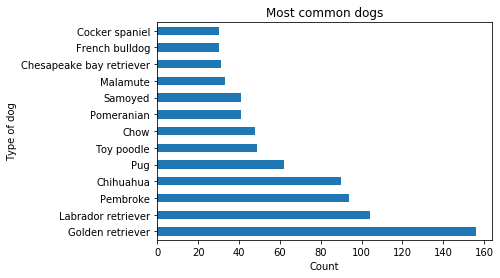

In [331]:
df2 = df.groupby('dog_predicted_type').filter(lambda x: len(x) >= 30)

df2['dog_predicted_type'].value_counts().plot(kind = 'barh')
plt.title('Most common dogs')
plt.xlabel('Count')
plt.ylabel('Type of dog');

fig = plt.gcf() 
fig.savefig('most_common_breeds.png',bbox_inches='tight');

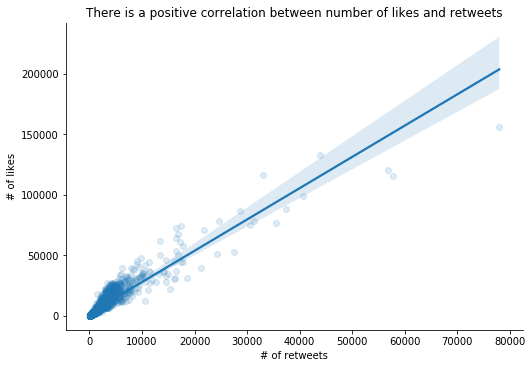

In [332]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           height = 5,
           aspect=1.5,
           scatter_kws={'alpha':1/7})
plt.title('There is a positive correlation between number of likes and retweets')
plt.xlabel('# of retweets')
plt.ylabel('# of likes');
plt.savefig('likes_x_retweets_correlation.png', bbox_inches='tight');

In [333]:
df.dog_stage.value_counts()

None               1403
pupper              166
doggo                53
puppo                21
floofer               7
doggo & pupper        7
doggo & floofer       1
doggo & puppo         1
Name: dog_stage, dtype: int64

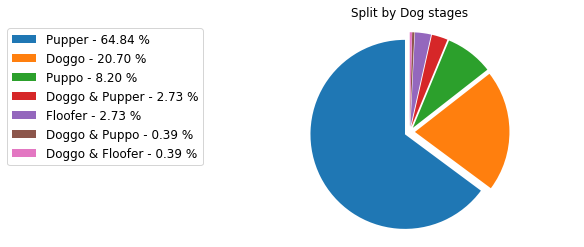

In [334]:
#pie on the most the dog_stages split
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo & Pupper', 'Floofer', 'Doggo & Puppo', 'Doggo & Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
percent = 100.*y/y.sum()

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 

patches, texts = plt.pie(y, startangle=90, radius=1.8,  explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]


plt.title('Split by Dog stages')
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=12)
plt.axis('equal')

plt.savefig('dog_stages.png', bbox_inches='tight')

In [336]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2058
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1659 non-null   int64  
 1   timestamp             1659 non-null   object 
 2   text                  1659 non-null   object 
 3   expanded_urls         1659 non-null   object 
 4   rating_numerator      1659 non-null   int64  
 5   name                  1659 non-null   object 
 6   jpg_url               1659 non-null   object 
 7   img_num               1659 non-null   int64  
 8   favorite_count        1659 non-null   int64  
 9   retweet_count         1659 non-null   int64  
 10  dog_stage             1659 non-null   object 
 11  dog_predicted_type    1659 non-null   object 
 12  dog_prediction_score  1659 non-null   float64
dtypes: float64(1), int64(5), object(7)
memory usage: 261.5+ KB
